# Multiple Linear Regression with Ethereum Stock Price

Building and evaluating a multiple regression model.

Predicting price of Ethereum using Multiple Linear Regression

In this project will attempt to predicting price of Ethereum using Multiple Linear Regression

The Overall Aim of the Priject:
- Finding a suitable dataset to implement a Multiple LInear Regression Model.
- Explaining the dataset, including source
- Make clear statments fo the objections of anaylsis including the null hypothesis and alternative hypothesis
- Visualisomg the dataset
- Assessing the models equation
- Visualise the model
- Evaluating the model
- Furthermore Validate our results using a validation set
- Conclusion of project

### Introduction/Relavance of project

### Dataset

Start date: 2016-03-10
End date:   2021-08-24


Link to [dataset](https://www.kaggle.com/odins0n/top-50-cryptocurrencies-historical-prices-starter/data?select=Ethereum.csv)

Obtained from investing.com

INclude a validation set from the same data source 

The dataset contains:
- 'Date' - Date of the cypto prices in NY EST Standard Time
- 'Price' - Price of Ethereum (in U.S. Dollers)
- 'Open' - Opening Price of Ethereum on the respective date
- 'High' - Highest Price of Ethereum on the respective date
- 'Low' - Lowest Price of Ethereum on the respective date
- 'Vol.' - Volume of Ethereum transacted on the respective date
- 'Change' - Percentage of Change in Ethereum Prices on the respective date

### Hypothesis

Null and alternative hypothesis

$H_0$: The 'Price' of the crypotocurrency Ethereum at any given day cannot be predicted by the 'Open', 'High' and 'Low' variables from our dataset for that day. The variables refer to the Opening Price, Highest Price and Lowest Price of Ethereum on that day.

$H_A$: The 'Price' of the crypotocurrency Ethereum at any given day cannot be predicted by the 'Open', 'High' and 'Low' variables from our dataset for that day. 



In [3]:
import pandas as pd

# Loads the 'Ethereum_Price_History_USD.csv' file as a DataFrame, using the 
# 'SNo' as the index column
Eth_Price_Data = pd.read_csv('Ethereum_Price_History_USD.csv', index_col='SNo')

# Show us the first 5 Rows in the 'Eth_Price_Data' DataFrame
Eth_Price_Data.head()

,Date,Price,Open,High,Low,Vol.,Change %
SNo,,,,,,,
1,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
3,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
4,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
5,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [4]:
print('Number of the days of Ethereum prices contained in the dataset: \n', len(Eth_Price_Data['Date']), 'days' )

Number of the days of Ethereum prices contained in the dataset: 
 1994 days


## Visualising the dataset

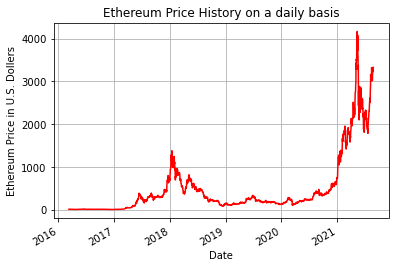

In [3]:
from matplotlib import pyplot as plt

## Styling the plots for the project
plt.style.use(style="seaborn")
%matplotlib inline

# Creates a new DataFrame for plotting the Ethereum price history purposes 
# only containing only the 'Date' and 'Price' Variables as it doesn't
# affect the original dataset
Plot_Eth_Price = pd.DataFrame(Eth_Price_Data, columns = ['Date', 'Price'])

# Creates a Variable 'Plot_Eth_Date' which contains the 'Date' variable only
# We do this to edit the dates without changing the rest of the dataset
Plot_Eth_Date = Plot_Eth_Price['Date']

# Converts the content in the 'Plot_Eth_Date ' variable to datetime
# This is needed for the 'autofmt_xdate()' function used to
## make the plot more readable

## Converts the content in the 'Plotting_Eth_Date' variable to 
## datetime. This is needed for the 'autofmt_xdate()' function 
## used to make the plot of the dataset more readable
Plot_Eth_Date = pd.to_datetime(Plot_Eth_Date)

plt.figure('Ethereum Price History')
plt.title('Ethereum Price History on a daily basis')
plt.xlabel('Date')
plt.ylabel('Ethereum Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plot_Eth_Date, Plot_Eth_Price['Price'], color = 'red')
plt.gcf().autofmt_xdate()
plt.savefig('Ethereum_Price_History.png')

plt.show()

In [4]:
# Creates a new DataFrame from the dataset that only contains the 'Price',
# 'High', 'Low' and 'Open' Columns
Eth_Price_Data = Eth_Price_Data[['Price', 'High', 'Low', 'Open']].dropna()


# Split our new DataFrame above
# 'data_X' will contain all the columns except the 'Price'
# 'data_Y' will contain only the 'Price' column
data_X = Eth_Price_Data.loc[:,Eth_Price_Data.columns !=  'Price' ]
data_Y = Eth_Price_Data['Price']

In [5]:
from sklearn.model_selection import train_test_split

# 'train_test_split' function splits the dataset into two parts: the training
# set and the testing set
# In this case, we are randomly putting 75% of the dataset into the training
# set and the remaining 25% into our testing set.
# The random nature in this process helps to vary the type of data in each set
train_X, test_X, train_Y,test_Y = train_test_split(data_X, data_Y, test_size=0.25)

In [6]:
from sklearn.linear_model import LinearRegression

# Creates a Linear Regressor model object and subsequently trains 
# our algroithm with our training set with the fit() method
regressor = LinearRegression()
regressor.fit(train_X,train_Y)

LinearRegression()

Our final linear regression model will be:

$ price = \beta_0  + \beta_1 . High + \beta_2 . Low + \beta_3. Open$

where

$ \beta_0 $ is the intercept

and

$ \beta_1 $, $ \beta_2 $ and $ \beta_3 $ are the coefficients

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make Predictions and Evaluate the results
# R2 Score
predict_Y = regressor.predict(test_X)
print('Prediction Score with our test set: ' , regressor.score(test_X,test_Y))

print('\n')

# 'mean_error_'
error = mean_squared_error(test_Y, predict_Y)
print('Mean Squared Error : ',error)

print('\n')
print('Prediction Score with our training set: ' , regressor.score(train_X,train_Y))
print('\n')
print('Coefficients: \n')
print(regressor.coef_)

print('\n')
print('Intercept: ', regressor.intercept_)

print('test')
meanAbError = mean_absolute_error(test_Y, predict_Y)
print('Mean Absolute Error: ', meanAbError)
print('Root Mean Squared Error: ', np.sqrt(error))

# The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

#The R Square is measure of how close the data are to the fitted regression line.

#In this case we can say that our model explains 79% of the training data & 75% of the testing data

#The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the regression line. Hence RMSE is a measure of how spread your residuals are.

#The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

#Coeff are the weights

#The intercept is the expected mean value of Y when all X=0

Prediction Score with our test set:  0.9992762751279761


Mean Squared Error :  408.83138886900565


Prediction Score with our training set:  0.9990938155131726


Coefficients: 

[ 0.92590588  0.66427455 -0.59711037]


Intercept:  0.8030002191404151
test
Mean Absolute Error:  8.816167238255424
Root Mean Squared Error:  20.219579344511736


R2 score is close to 1 which indicates that the model used is good.

Both plots are done seperately because they overlap too similerly 

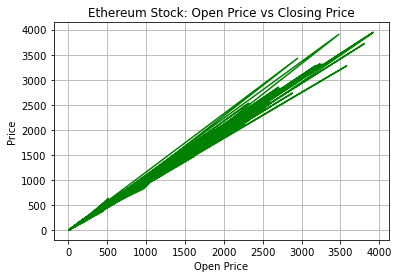

In [13]:
#Plot the predicted and the expected values

plt.title('Ethereum Stock: Open Price vs Closing Price')
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.grid(True)
plt.plot(test_X['Open'],test_Y, color = 'green')
plt.show()

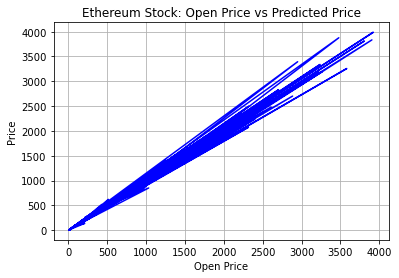

In [14]:
#Plot the predicted and the expected values

plt.title('Ethereum Stock: Open Price vs Predicted Price')
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.grid(True)
plt.plot(test_X['Open'], predict_Y, color = 'blue')
plt.show()

In [15]:
answer = pd.DataFrame({'Actual Price' :test_Y, 'Predicted Price' :predict_Y, 'Difference' :test_Y-predict_Y })

answer

,Actual Price,Predicted Price,Difference
SNo,,,
1367,148.89,147.960992,0.929008
1160,196.02,202.670853,-6.650853
543,350.63,354.004911,-3.374911
865,459.02,466.214655,-7.194655
695,920.85,852.750949,68.099051
...,...,...,...
1306,170.55,171.303507,-0.753507
1742,588.91,588.749016,0.160984
787,818.33,820.010120,-1.680120


The model suggests that the high-price, low-price and open-price are indicative of the closing price of the same day. Based on the found coefficients, we conclude that the high-price is most influential on the closing price.

-------------------------------------------------------

## Further testing of our model with a validation set

In [24]:
validation_set = pd.read_csv('Validation_set_for_ETH.csv', index_col='SNo')

validation_set.head(15)

,Date,Price,Open,High,Low
SNo,,,,,
1,2021-10-09,4735.07,4810.07,4837.59,4718.04
2,2021-10-08,4812.09,4619.65,4822.36,4619.65
3,2021-10-07,4620.55,4523.98,4640.92,4510.98
4,2021-10-06,4521.58,4482.65,4531.00,4334.97
5,2021-10-05,4486.24,4537.42,4570.90,4447.49
6,2021-10-04,4537.32,4604.68,4606.52,4426.62
7,2021-10-03,4607.19,4589.68,4664.91,4462.98
8,2021-10-02,4584.80,4322.50,4599.95,4288.69
9,2021-10-01,4324.63,4288.22,4377.32,4160.97


In [26]:
validating_model = pd.DataFrame(validation_set[['High', 'Low', 'Open']])
#tested_model.head()
#print(tested_model)

#test_model = 

valid_Y = regressor.predict(validating_model)

valid_actual_Y = validation_set['Price']

#print('predict_y')
#print(predict_y)


answer = pd.DataFrame({'Actual Price' :valid_actual_Y, 'Predicted Price' :valid_Y, 'Difference' :valid_actual_Y-valid_Y })

answer

,Actual Value,Predicted Value,Difference
SNo,,,
1,4735.07,4755.709979,-20.639979
2,4812.09,4787.232683,24.857317
3,4620.55,4604.697960,15.852040
4,4521.58,4412.202295,109.377705
5,4486.24,4491.002457,-4.762457
6,4537.32,4471.120335,66.199665
7,4607.19,4557.240249,49.949751
8,4584.80,4537.682948,47.117052
9,4324.63,4269.358977,55.271023


In [34]:
print('Number of days of data in our validation set: ', len(validating_model['High']))


print('Sum of the Differences between our Predicted Price and Acutal Price: \n', sum(answer['Difference']))

avg_diff = sum(answer['Difference']) / len(answer['Difference'])

print('Average Difference per day between our Predicted Price and Acutal Price: \n', avg_diff)

Number of days of data in our validation set:  14
Sum of the Differences between our Predicted Price and Acutal Price: 
 225.46608866832048
Average Difference per day between our Predicted Price and Acutal Price: 
 16.10472061916575


---------------------------------------------------------------------

### Stolen Conclusion

Important to note is that the model has been created based on data that has been collected at the same moment in time. This means that the variables we have collected are published at the same time as the closing-price is. We believe that the model would also be able to give a rough estimate of what the closing-price will be based on the current high- and low-prices on a given day, however this has not been investigated. 

Based on the model, we have an idea about which variables influence the closing-price of Bitcoin. With this knowledge, we can attempt to create similar models for other cryptocurrencies. It is important to note that we must not assume this model is a perfect fit for any cryptocurrency, it should merely serve as a starting point when designing models that describe the closing-price of other currencies.

As a final reminder, the price of Bitcoin is likely not solely dependent on the variables we have mentioned here. As with any other product, market sentiment and a host of other variables are likely to influence change in prices as well. Concretely this means that statements of influential figures can move prices, but this is not captured in our data. Thus our model is based purely on empirical measurements and excludes variables that can not be expressed numerically.

--------------------------------------------------------------------

#### Strruction for Report

- Introdution
- 